<a href="https://colab.research.google.com/github/jasojone/CS-4210.01-F23-Regular-Machine-Learning-and-Its-Apps/blob/main/cs4210hw4fall23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#-------------------------------------------------------------------------
# AUTHOR: Jason Jones
# FILENAME: deep_learning.py
# SPECIFICATION: This program will use the Fashion MNIST dataset to train a neural network to classify images of clothing.
# FOR: CS 4210- Assignment #4
# TIME SPENT: 1 hour
#-----------------------------------------------------------*/

# importing the libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:

def build_model(n_hidden, n_neurons_hidden, n_neurons_output, learning_rate):
    # Creating the Neural Network using the Sequential API
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))  # input layer

    # iterate over the number of hidden layers to create the hidden layers
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons_hidden, activation="relu"))  # hidden layer with ReLU activation function

    # output layer
    model.add(keras.layers.Dense(n_neurons_output, activation="softmax"))  # output layer with softmax

    # defining the learning rate
    opt = keras.optimizers.SGD(learning_rate)

    # Compiling the Model specifying the loss function and the optimizer to use
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model



In [3]:

# Using Keras to Load the Dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# creating a validation set and scaling the features
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# For Fashion MNIST, we need the list of class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Variables to keep track of the best model and accuracy
best_model = None
highestAccuracy = 0
best_params = {}

# Iterate here over number of hidden layers, number of neurons in each hidden layer and the learning rate
n_hidden = [2, 5, 10]
n_neurons = [10, 50, 100]
l_rate = [0.01, 0.05, 0.1]

for h in n_hidden:                        # looking for the best parameters w.r.t the number of hidden layers
    for n in n_neurons:                    # looking for the best parameters w.r.t the number of neurons
        for l in l_rate:                   # looking for the best parameters w.r.t the learning rate

            # build the model for each combination by calling the function
            model = build_model(h, n, 10, l)  # 10 output neurons for 10 classes

            # To train the model
            history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

            # Evaluate the model on the test data
            test_loss, test_acc = model.evaluate(X_test, y_test)

            # Calculate the accuracy and update if this is the best model so far
            if test_acc > highestAccuracy:
                highestAccuracy = test_acc
                best_model = model
                best_params = {'hidden_layers': h, 'neurons': n, 'learning rate': l}

            print(f"Highest accuracy so far: {highestAccuracy}")
            print(f"Parameters: Number of Hidden Layers: {h}, Number of Neurons: {n}, Learning Rate: {l}")
            print()


4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0398 - accuracy: 0.6251 - val_loss: 0.6861 - val_accuracy: 0.7416
Epoch 2/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6250 - accuracy: 0.7813 - val_loss: 0.5819 - val_accuracy: 0.8040
Epoch 3/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5373 - accuracy: 0.8133 - val_loss: 0.5048 - val_accuracy: 0.8226
Epoch 4/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4982 - accuracy: 0.8270 - val_loss: 0.4946 - val_accuracy: 0.8232
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 136.0087 - accuracy: 0.7378
Highest accuracy so far: 0.7378000020980835
Parameters: Number of Hidden Layers: 2, Number of Neurons: 10, Learning Rate: 0.01

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7456 - accuracy: 0.7311 - val_loss: 0.5316 - val_accuracy: 

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_63 (Dense)            (None, 100)               78500     
                                                                 
 dense_64 (Dense)            (None, 100)               10100     
                                                                 
 dense_65 (Dense)            (None, 100)               10100     
                                                                 
 dense_66 (Dense)            (None, 100)               10100     
                                                                 
 dense_67 (Dense)            (None, 100)               10100     
                                                                 
 dense_68 (Dense)            (None, 10)              

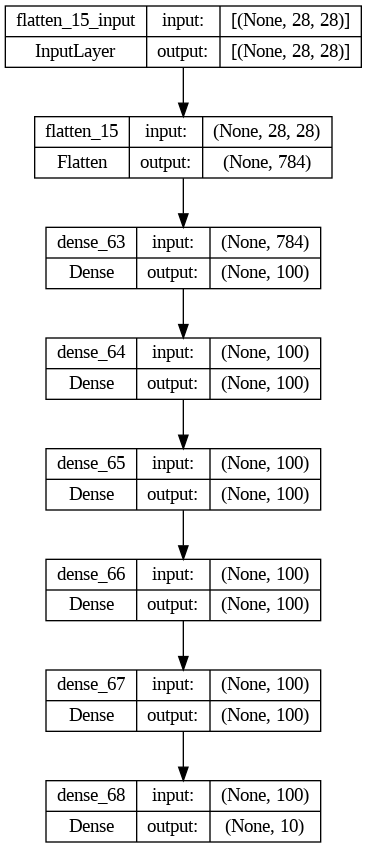

In [4]:

# After generating all neural networks, print the summary of the best model found
print(best_model.summary())
img_file = './model_arch.png'
# Plot the best model
# tf.keras.utils.plot_model(best_model, to_file=img_file, show_shapes=True, show_layer_names=True) # to visualize the architecture of the best model
tf.keras.utils.plot_model(best_model, to_file='model_arch.png', show_shapes=True, show_layer_names=True) # to visualize the architecture of the best model


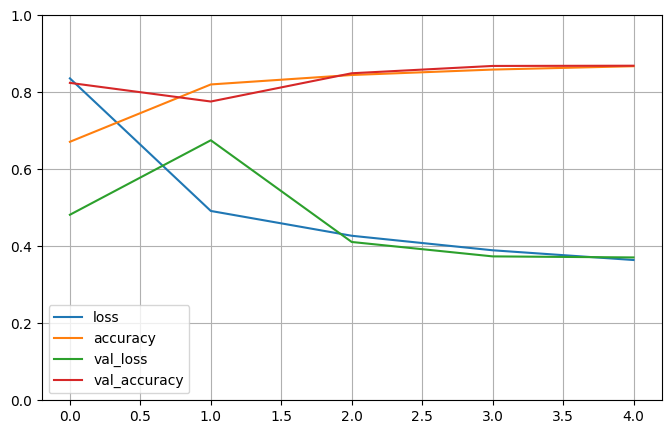

In [5]:

# plotting the learning curves of the best model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()
